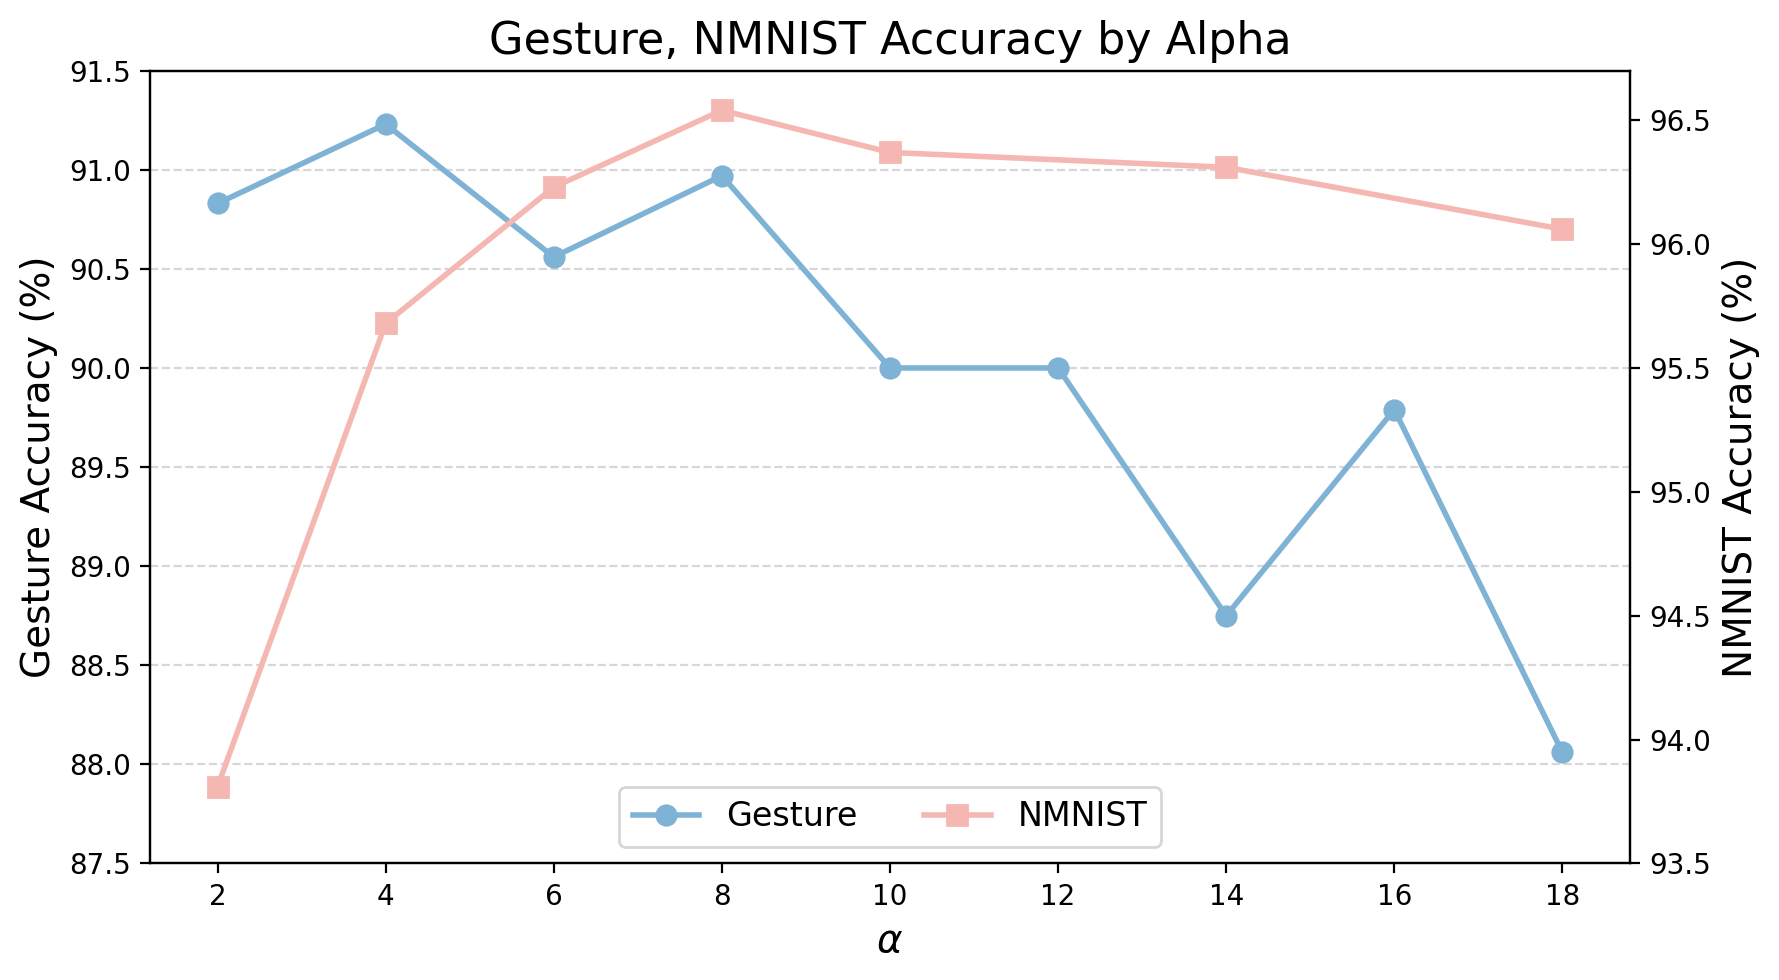

In [3]:

nmnist_alpha = [2, 4, 6, 8, 10, 14, 18]
nmnist_accuracy = [93.81, 95.68, 96.23, 96.54, 96.37, 96.31, 96.06]

gesture_alpha = [2, 4, 6, 8, 10, 12, 14, 16, 18]
gesture_accuracy = [90.83, 91.23, 90.56, 90.97, 90.00, 90.00, 88.75, 89.79, 88.06]


import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(9, 5), dpi=200)

ax1 = plt.gca()
ax1.plot(
    gesture_alpha, gesture_accuracy,
    marker='o', linewidth=2, markersize=7,
    color="#7FB3D5", label="Gesture"
)
ax1.set_ylabel("Gesture Accuracy (%)", fontsize=14)
ax1.set_ylim(87.5, 91.5)

ax2 = ax1.twinx()

# NMNIST는 실제 alpha 위치만 연결해 그린다
ax2.plot(
    nmnist_alpha, nmnist_accuracy,
    marker='s', linewidth=2, markersize=7,
    color="#F5B7B1", label="NMNIST"
)

ax2.set_ylabel("NMNIST Accuracy (%)", fontsize=14)
ax2.set_ylim(93.5, 96.7)

# x축 제목
ax1.set_xlabel(r"$\alpha$", fontsize=14)

plt.xticks(gesture_alpha, fontsize=12)
plt.title("Gesture, NMNIST Accuracy by Alpha", fontsize=16)

ax1.grid(axis='y', linestyle='--', alpha=0.5)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
# plt.legend(h1 + h2, l1 + l2, fontsize=12)
plt.legend(
    h1 + h2, l1 + l2,
    fontsize=12,
    loc='lower center',
    bbox_to_anchor=(0.5,0.0001), 
    ncol=2                         # 두 줄 대신 한 줄로 깔끔하게
)
plt.tight_layout()
plt.show()


z_gesture_log_algorithm4.log → 개수: 201
z_gesture_log_algorithm1.log → 개수: 201
z_gesture_log_algorithm2.log → 개수: 201
z_gesture_log_algorithm3.log → 개수: 201


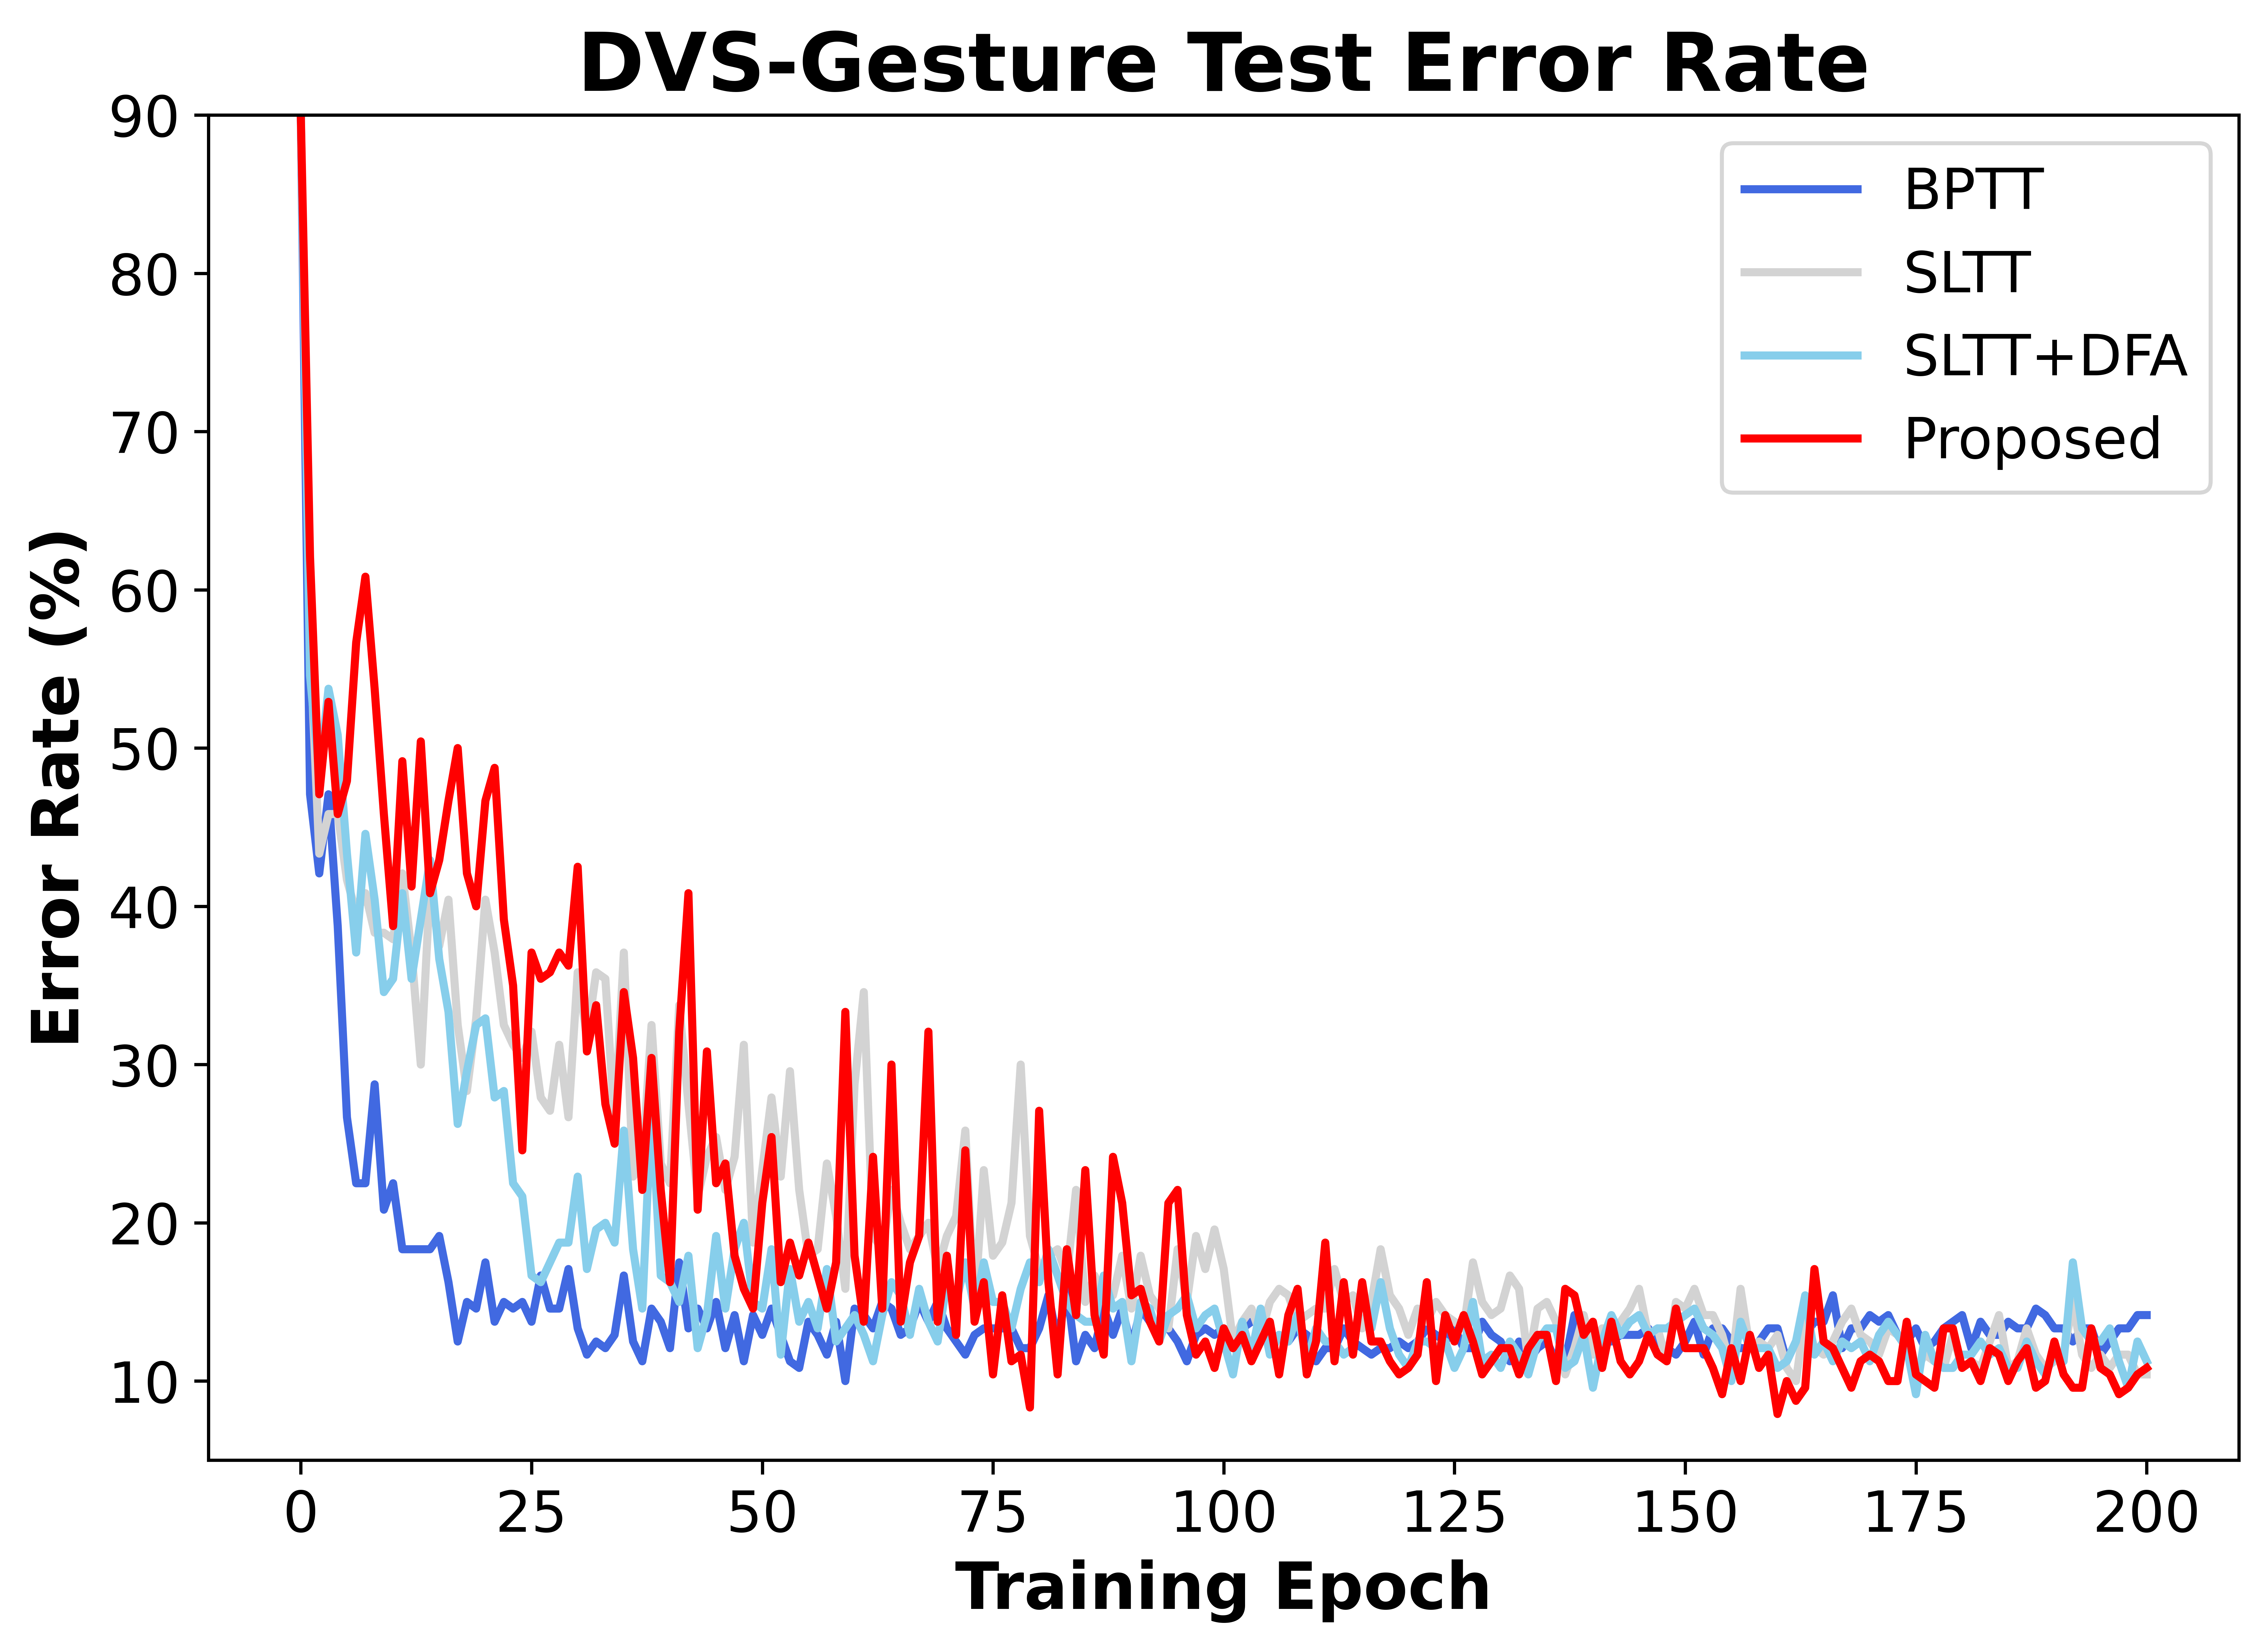

In [1]:
import re
import matplotlib.pyplot as plt

filenames = [
    "z_gesture_log_algorithm4.log",  # BPTT
    "z_gesture_log_algorithm1.log",  # SLTT
    "z_gesture_log_algorithm2.log",  # SLTT+DFA
    "z_gesture_log_algorithm3.log",  # Proposed
]
legendnames = [
    "BPTT",
    "SLTT",
    "SLTT+DFA",
    "Proposed",
]

# ---- 컬러 팔레트 ---- #
colors = [
    "royalblue",    # BPTT (기준 알고리즘)
    "lightgray",    # SLTT
    "skyblue",      # SLTT+DFA
    "red",          # Proposed
]

all_vals = {}

for fname in filenames:
    vals = []
    with open(fname, "r", encoding="utf-8") as f:
        for line in f:
            match = re.search(r"val:\s*([0-9]+\.[0-9]+)%", line)
            if match:
                vals.append(float(match.group(1)))
            if len(vals) >= 200:
                break

    vals = [10.00] + vals
    all_vals[fname] = vals
    print(f"{fname} → 개수: {len(vals)}")

plt.figure(figsize=(9,6), dpi=1000)

for (fname, vals), legend, color in zip(all_vals.items(), legendnames, colors):
    epochs = list(range(len(vals)))
    test_errors = [100 - v for v in vals]
    plt.plot(epochs, test_errors, label=legend, color=color, linewidth=2)

plt.xlabel("Training Epoch", fontsize=16, fontweight='bold')
plt.ylabel("Error Rate (%)", fontsize=16, fontweight='bold')
plt.title("DVS-Gesture Test Error Rate", fontsize=20, fontweight='bold')
plt.ylim(5, 90)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(False)
plt.legend(fontsize=14)

plt.savefig("z_gesture_curve.pdf", transparent=True, bbox_inches="tight")


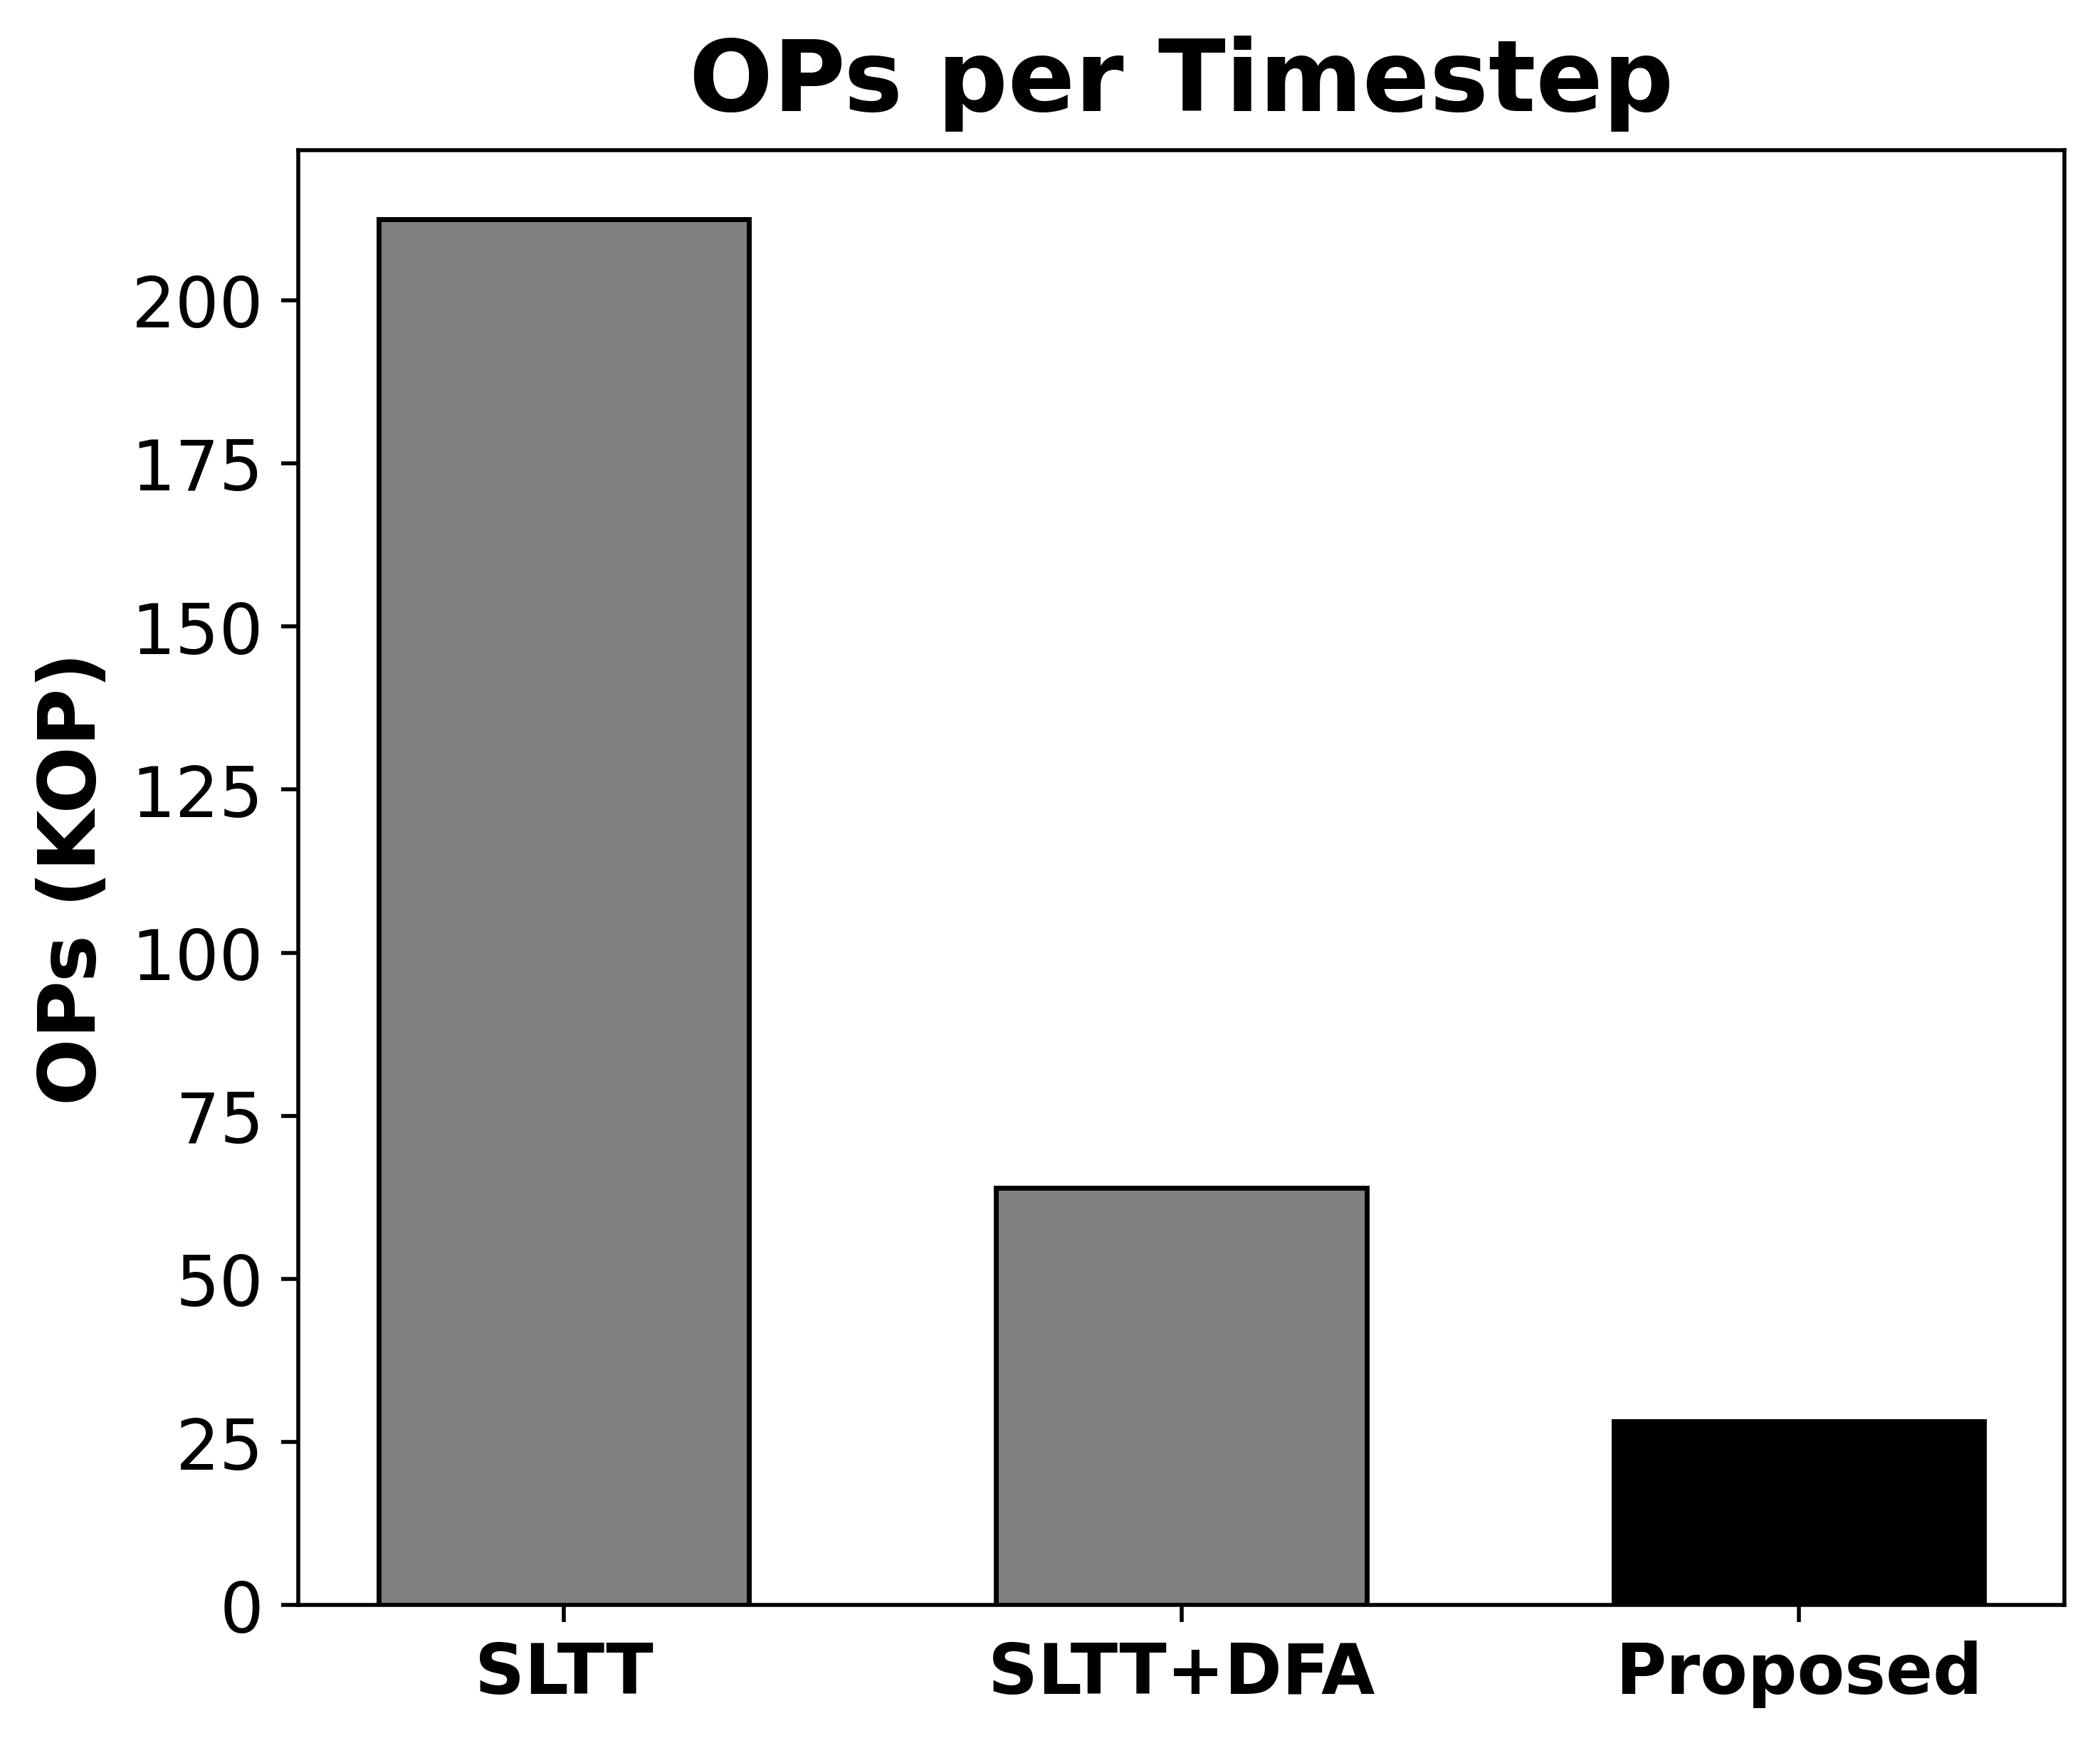

In [3]:
import matplotlib.pyplot as plt

# 1. 데이터 정의
algorithms = ['SLTT', 'SLTT+DFA', 'Proposed']
ops_values = [212.4, 64.0, 28.2]

# 2. 색상 및 테두리 설정
colors = ['gray', 'gray', 'black']
edgecolors = ['black', 'black', 'black']

# 3. 그래프 생성
plt.figure(figsize=(6, 5), dpi=500)
bars = plt.bar(algorithms, ops_values, color=colors, edgecolor=edgecolors, width=0.6)

# 4. 디자인 요소 추가 (폰트 크기 확대)
plt.title('OPs per Timestep', fontsize=20, pad=8, fontweight='bold') # 제목 크기 20
plt.ylabel('OPs (KOP)', fontsize=16, fontweight='bold') # 축 제목 크기 16

# 눈금 폰트 크기 조절
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14)

# # 5. 막대 위에 수치 텍스트 표시
# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2.0, height,
#              f'{height}KOP',
#              ha='center', va='bottom', fontsize=14, fontweight='bold') # 수치 크기 14

# 6. 그래프 표시
plt.tight_layout()
plt.show()

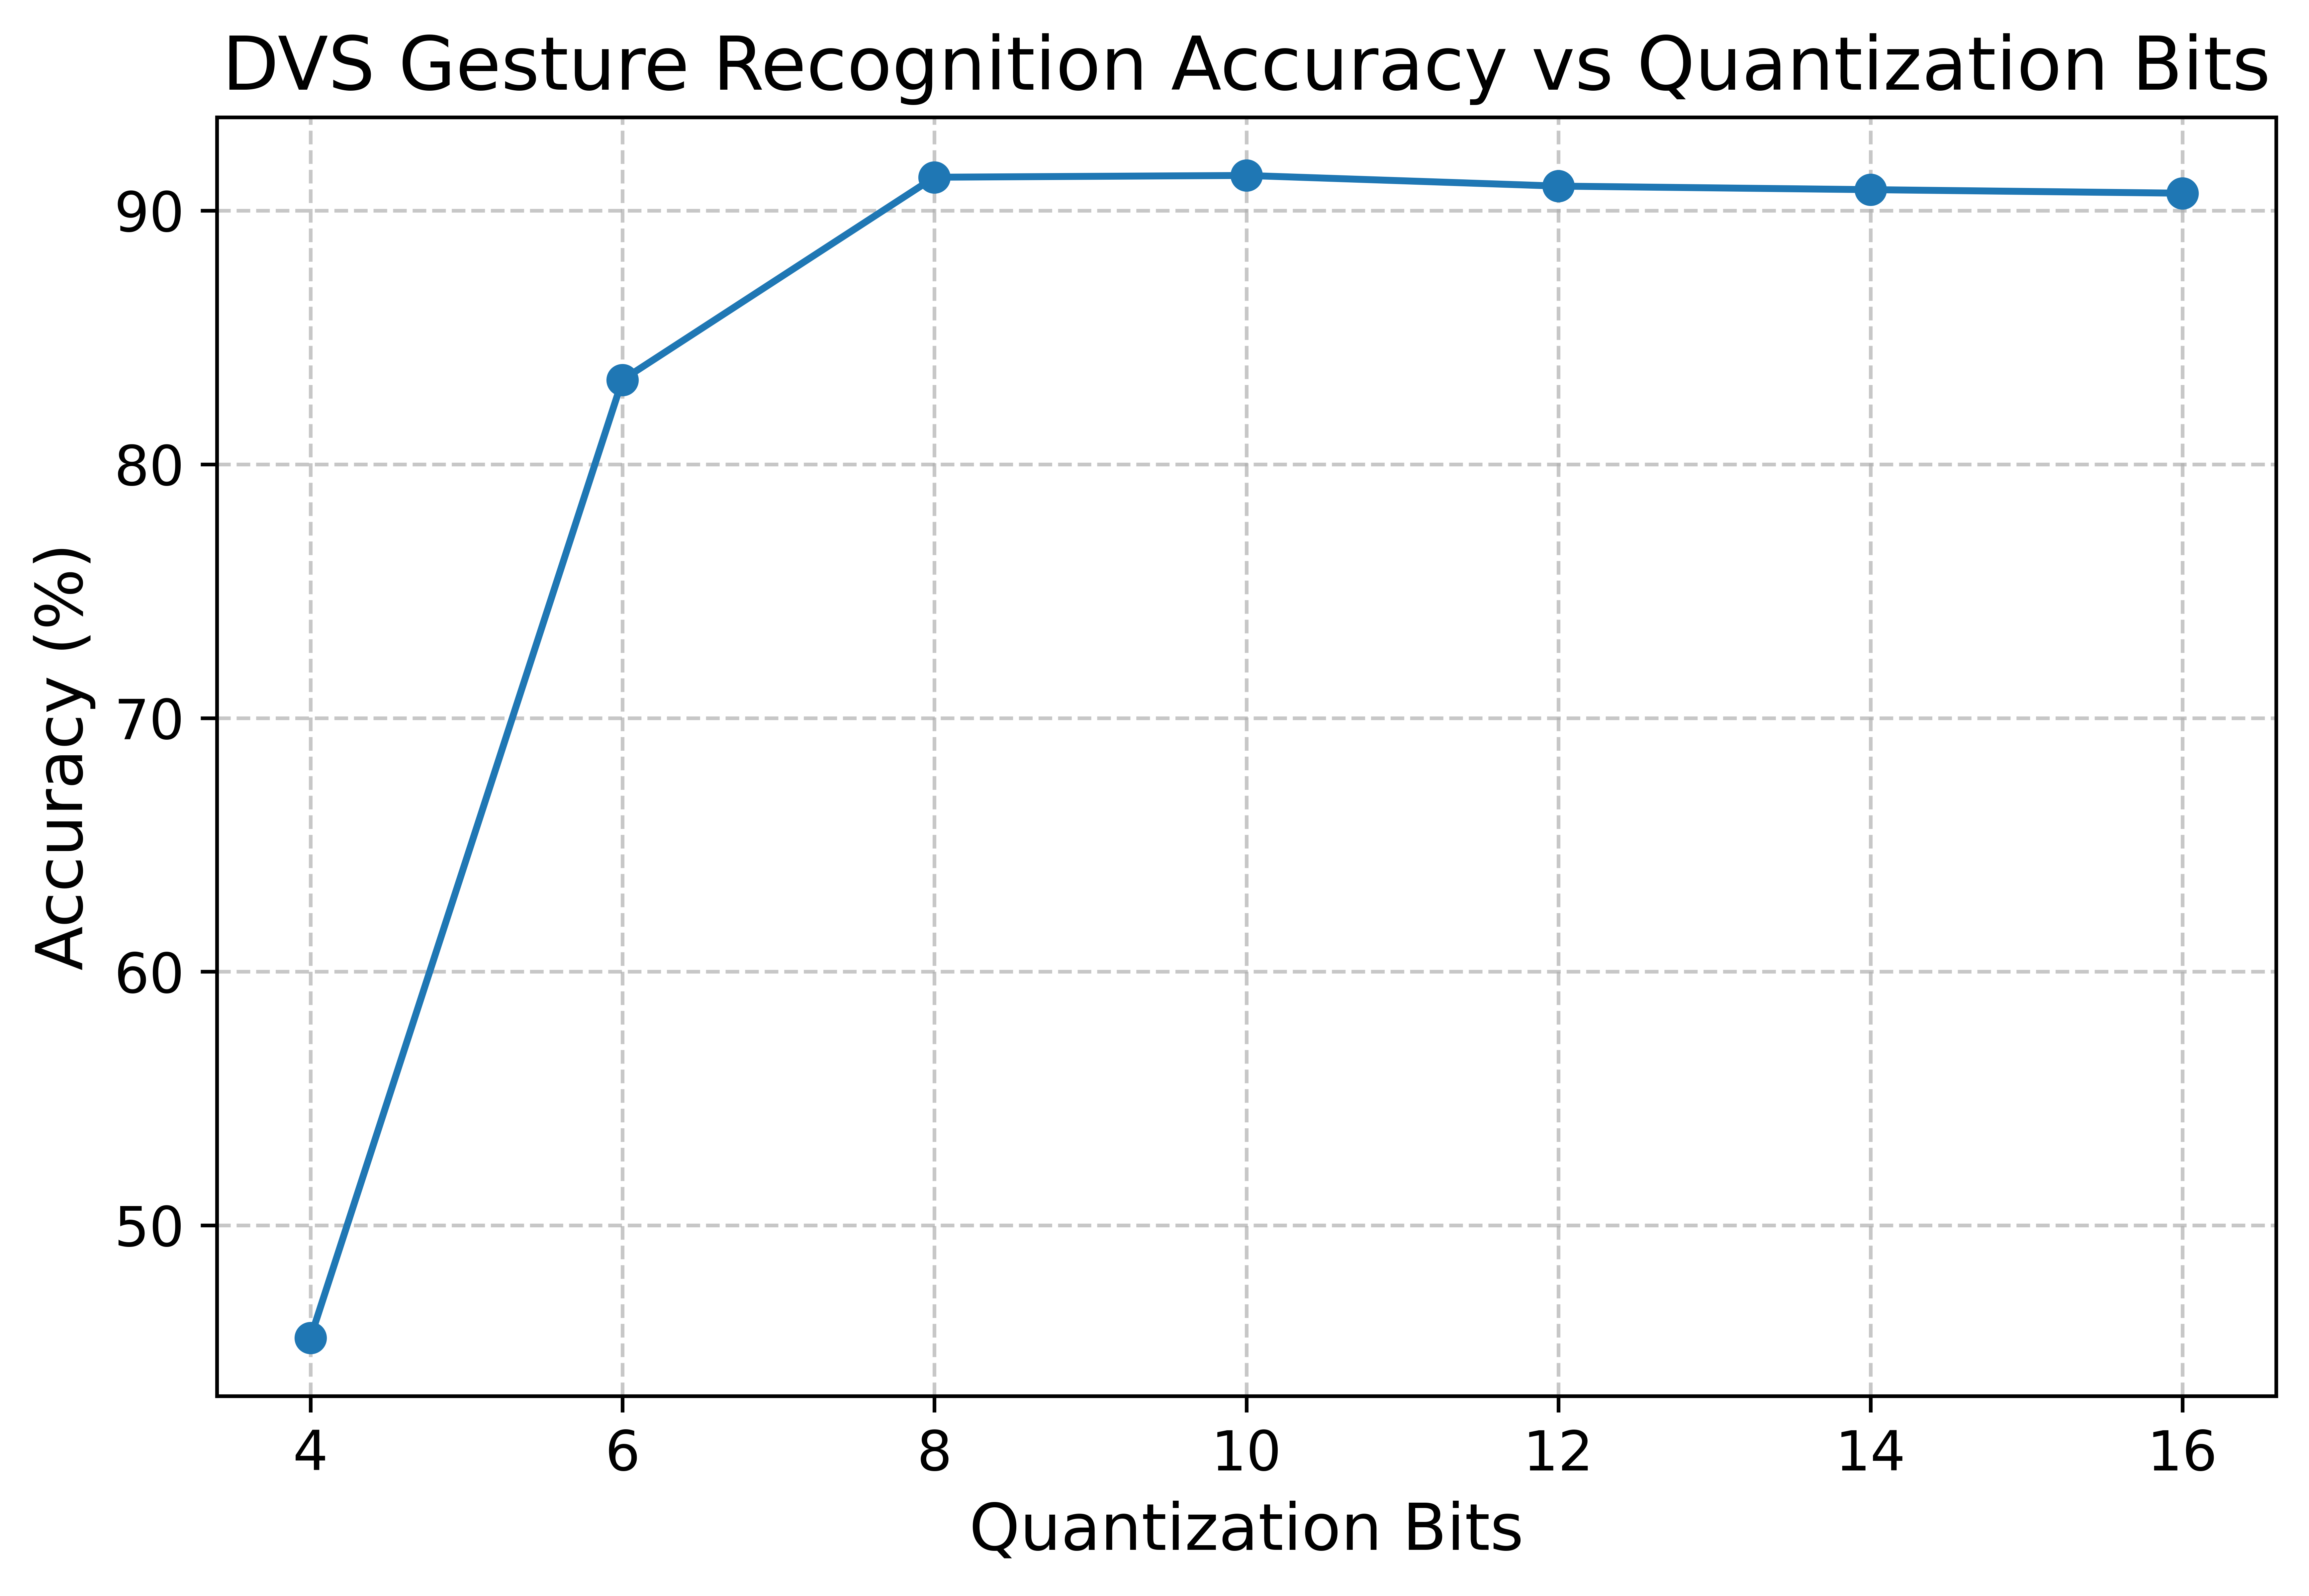

In [4]:
import matplotlib.pyplot as plt

quantization_bits = [4, 6, 8, 10, 12, 14, 16]
DVS_Gesture_Accuracy = [45.56, 83.33, 91.32, 91.39, 90.97, 90.83, 90.69]

plt.figure(figsize=(8,5), dpi=1000)  # dpi를 높여 그래프 해상도 증가
plt.plot(quantization_bits, DVS_Gesture_Accuracy, marker='o', linestyle='-', color='tab:blue')

plt.xlabel('Quantization Bits', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.title('DVS Gesture Recognition Accuracy vs Quantization Bits', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(quantization_bits, fontsize=12)
plt.yticks(fontsize=12)

plt.show()
